In [5]:
import joblib
import eli5
import pandas as pd
from FeatureTransformer import FeatureTransformer
import pandas as pd
import ast
import spacy
from Custom import *
from sklearn_crfsuite import metrics
from model.evaluation_utils import visualize_transitions, print_annotated_text, crf_roc_curve

In [6]:
be = joblib.load('best_estimator.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'best_estimator.pkl'

In [ ]:
# Load the Test data
TEST_FILENAME = "../../01_data/preprocessedData/random_dev_sentences.csv"
df_test = pd.read_csv(TEST_FILENAME)
df_test["askable_tokens"] = [ast.literal_eval(t) for t in df_test["askable_tokens"]]
df_test["sentence_tokens"] = [ast.literal_eval(t) for t in df_test["sentence_tokens"]]

y_test = df_test["askable_tokens"]

TRAIN_FILENAME = "01_data/preprocessedData/random_train_sentences.csv"
df_train = pd.read_csv(TRAIN_FILENAME)
df_train["askable_tokens"] = [ast.literal_eval(t) for t in df_train["askable_tokens"]]
df_train["sentence_tokens"] = [ast.literal_eval(t) for t in df_train["sentence_tokens"]]

df_train = df_train.sample(n=10000, random_state=1)

y_train = df_train["askable_tokens"]

In [4]:
#pd.concat([df_train, df_test], ignore_index=True)

In [5]:
nlp = spacy.load('en_core_web_md')
nlp.tokenizer = custom_tokenizer(pd.concat([df_train, df_test], ignore_index=True), nlp)

feature_transformer = FeatureTransformer(nlp)

In [6]:
train_feature = feature_transformer.fit_transform(df_train["sentence_text"])
test_feature = feature_transformer.transform(df_test["sentence_text"])

10000it [01:27, 113.72it/s]
10000it [01:43, 96.80it/s]
23793it [05:27, 72.72it/s] 


In [7]:
y_pred_test = be.predict(test_feature)
y_pred_test_marginals = be.predict_proba(test_feature)

y_pred_train = be.predict(train_feature)
y_pred_train_marginals = be.predict_proba(train_feature)

             precision    recall  f1-score   support

   I-Answer    0.42032   0.01125   0.02191     77621
          O    0.87942   0.99785   0.93490    560941

avg / total    0.82361   0.87793   0.82392    638562



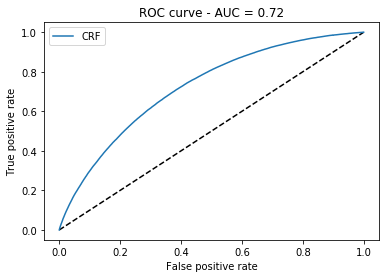

In [8]:
# Evaluate Standard Evaluation Metricies
print(metrics.flat_classification_report(y_test, y_pred_test, digits=5))
crf_roc_curve(y_test, y_pred_test_marginals)

             precision    recall  f1-score   support

   I-Answer    0.59903   0.01288   0.02522     38500
          O    0.85593   0.99853   0.92175    226109

avg / total    0.81855   0.85512   0.79130    264609



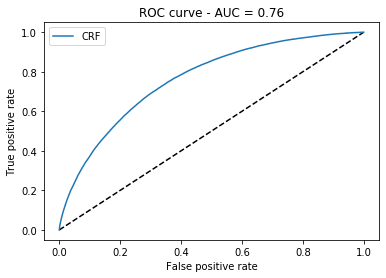

In [9]:
# Evaluate Standard Evaluation Metricies
print(metrics.flat_classification_report(y_train, y_pred_train, digits=5))
crf_roc_curve(y_train, y_pred_train_marginals)

In [12]:
eli5.show_weights(be, top=25)

## .......

In [11]:
# Print one example output
paragraph = nlp("A Japan-exclusive manga series based on Twilight Princess, penned and illustrated by Akira Himekawa, was first released on February 8, 2016. The series is available solely via publisher Shogakukan's MangaOne mobile application. While the manga adaptation began almost ten years after the initial release of the game on which it is based, it launched only a month before the release of the high-definition remake.")
y_true = ['O', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I', 'I', 'O', 'O', 'O', 'O', 'O', 'I', 'I', 'I', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'I', 'O', 'O', 'I', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

tokens =[token.text for token in paragraph]
y_pred = model.predict_marginals_single(text2features(paragraph, pos_features=POS_FEATURES, ent_type_features=ENT_TYPE_FEATURES, lemma_features=LEMMA_FEATURES, is_features=IS_FEATURES, position_features=POSITION_FEATURES, bias=BIAS, begin=BEGIN, end=END))
print_annotated_text(tokens, y_pred, y_trues=y_true)

IndexError: list index out of range

In [ ]:
# Print 100 randomly sampled text
from IPython.display import Latex
for index, row in df_askable_paragraph_test.iterrows(): #.sample(n=100, random_state=1)
    if nlp(row["paragraph_context"])[:3].text == "The Norman dynasty":
        paragraph = nlp(row["paragraph_context"])
        y_true = row["askable_tokens"]
        tokens =[token.text for token in paragraph]
        y_pred = model.predict_marginals_single(text2features(paragraph, pos_features=POS_FEATURES, ent_type_features=ENT_TYPE_FEATURES, lemma_features=LEMMA_FEATURES, is_features=IS_FEATURES, position_features=POSITION_FEATURES, bias=BIAS, begin=BEGIN, end=END))

        print_annotated_text(tokens, y_pred, y_trues=y_true)
        Latex(print_annotated_text_latex(tokens, y_pred, y_trues=y_true))